# Kr83m First Analysis

Data : Nov 2016 

Pax version : 6.5.0

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from multihist import Histdd

In [2]:
%matplotlib inline

In [3]:
matplotlib.rc('font', size=16)                   # Use big fonts...
plt.rcParams['figure.figsize'] = (12.0, 10.0)    # ... and big plots

In [4]:
from pax.configuration import load_configuration
pax_config = load_configuration('XENON1T')

In [5]:
n_channels = pax_config['DEFAULT']['n_channels']
pmts = pax_config['DEFAULT']['pmts']
tpc_height = pax_config['DEFAULT']['tpc_length']
tpc_radius = pax_config['DEFAULT']['tpc_radius']
gains = pax_config['DEFAULT']['gains']
busy_on_ch = pax_config['DEFAULT']['channels_in_detector']['busy_on'][0]

In [6]:
# Initialize hax
import hax

hax.__version__
hax.init(raw_data_access_mode='local',
         raw_data_local_path='/project/lgrandi/xenon1t/raw',
         minitree_paths = ['/home/masbou/scratch-midway/minitrees/pax_v6.5.0'])

In [7]:
dataset=[4580+ i for i in range(12)]

In [8]:
dataset2=[4608+i for i in range(6)]

In [9]:
dataset3=[4593+i for i in range(16)]

In [10]:
data= hax.minitrees.load(dataset + dataset2 + dataset3, treemakers=['Basics','DoubleScatter'])

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/pandas/computation/align.py:98: RuntimeWarning: divide by zero encountered in log10
  ordm = np.log10(abs(reindexer_size - term_axis_size))


In [11]:
print('Total number of events = ', len(data))

Total number of events =  3252625


## Double Scatter TreeMaker

For this analysis, we need : 
- Main S1 (PE)= s1_a (32.2 keV)
- Second main S1 (PE)= s1_b (9.4 keV)
- Delay Time (ns)= s1_b_center_time-s1_a_center_time
- Number of PMTs contributing to main S1 = s1_b_n_contributing_channels
- Number of PMTs contributing to s1_b distinct from the PMTs that contributed to s1_a = ds_s1_b_n_distinct_channels

So, we use the double scattered treemaker which : 

- Search for a interaction (giving S1_0 and S2_0)
- Search for other interaction (giving S1_1 and S2_1)
- Order in times the scatters (giving S1_a for the 1st S1 and S1_b for the 2nd)
- Find the largest hits in each channel,  S1_a and S1_b and determine peaks and interactions information (Peak and Interaction Output)

Peak Output (for PEAK in [s1_a, s2_a, s1_b, s2_b, s1_2, s2_2])
- PEAK : The uncorrected area in pe of the peak
- PEAK_area_fraction_top : The fraction of uncorrected area in the peak seen by the top array
- PEAK_center_time : The center_time in ns of the peak

- PEAK_n_contributing_channels : The number of PMTs contributing to the peak
- PEAK_range_50p_area : The width of the peak (ns), duration of region that contains 50% of the area of the peak

Interaction Output (for INT in [int_a, int_b])
- INT_x : The x-position of this interaction (primary algorithm chosen by pax, currently TopPatternFit)
- INT_y : The y-position of this interaction
- INT_z : The z-position of this interaction
- INT_s1_area_correction : The multiplicative s1 area correction of this interaction
- INT_s2_area_correction : The multiplicative s2 area correction of this interaction
- INT_drift_time : The drift time in ns (pax units) of this interaction
- INT_s1_pattern_fit : The s1 pattern fit (-log liklihood) of this interaction

DoubleScatter Specific Output
- ds_s1_b_n_distinct_channels : number of PMTs contributing to s1_b distinct from the PMTs that contributed to s1_a
- ds_second_s2 : True if selected interactions have distinct s2s


In [12]:
hax.misc.code_hider()

In [13]:
# data_good=data[(data['s1_a']>0)&(data['s1_b']>0)]
# #print(len(data_good))

In [19]:
df=data

In [16]:
# dfs=[]
# lens=[]
# # immediately apply full TPC fiducial cut, also removes NANs
# dfs.append( dat[ (dat['int_a_z'] <= 0.0) & (dat['int_a_z'] >= -tpc_height)
#              & (dat['int_a_x']**2 + dat['int_a_y']**2 <= tpc_radius**2)
#              & (dat['int_b_z'] <= 0.0) & (dat['int_b_z'] >= -tpc_height)
#              & (dat['int_b_x']**2 + dat['int_b_y']**2 <= tpc_radius**2)] )
# lens.append(len(dat))
# del dat

In [20]:
#Definition of Delay Time
df['s1_dt_center_time'] = df['s1_b_center_time'] - df['s1_a_center_time']
df.head()

,run_number,event_number,ds_s1_b_n_distinct_channels,int_a_drift_time,int_a_s1_area_correction,int_a_s1_pattern_fit,int_a_s2_area_correction,int_a_x,int_a_y,int_a_z,...,s1,s1_area_fraction_top,s1_range_50p_area,s2,s2_area_fraction_top,s2_range_50p_area,x,y,z,s1_dt_center_time
0,4580,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3294.099121,0.185732,81.861703,1.270023e+05,0.635324,1299.409256,23.261141,38.049404,-55.474262,NaN
1,4580,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9759.347656,0.222315,79.345684,1.034052e+06,0.595508,1214.827954,-3.856259,43.991539,-42.852127,NaN
2,4580,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2301.787598,0.411763,72.207791,1.329131e+06,0.573592,483.387284,-39.026943,9.102130,0.090720,NaN
3,4580,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3551.049072,0.136627,78.617819,1.900585e+05,0.628198,3161.201696,18.007853,38.257832,-68.886574,NaN
4,4580,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,805.076660,0.391720,78.000252,9.671326e+04,0.668173,227.277866,23.815439,3.865289,-0.357954,NaN


# Shape of the data with no cut

In [21]:
df['cs1_a'] =df['s1_a'] * df['int_a_s1_area_correction']
df['cs1_b'] =df['s1_b'] * df['int_b_s1_area_correction']
df['cs2_a'] =df['s2_a'] * df['int_a_s2_area_correction']

df.head()

,run_number,event_number,ds_s1_b_n_distinct_channels,int_a_drift_time,int_a_s1_area_correction,int_a_s1_pattern_fit,int_a_s2_area_correction,int_a_x,int_a_y,int_a_z,...,s2,s2_area_fraction_top,s2_range_50p_area,x,y,z,s1_dt_center_time,cs1_a,cs1_b,cs2_a
0,4580,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.270023e+05,0.635324,1299.409256,23.261141,38.049404,-55.474262,NaN,NaN,NaN,NaN
1,4580,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.034052e+06,0.595508,1214.827954,-3.856259,43.991539,-42.852127,NaN,NaN,NaN,NaN
2,4580,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.329131e+06,0.573592,483.387284,-39.026943,9.102130,0.090720,NaN,NaN,NaN,NaN
3,4580,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.900585e+05,0.628198,3161.201696,18.007853,38.257832,-68.886574,NaN,NaN,NaN,NaN
4,4580,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.671326e+04,0.668173,227.277866,23.815439,3.865289,-0.357954,NaN,NaN,NaN,NaN


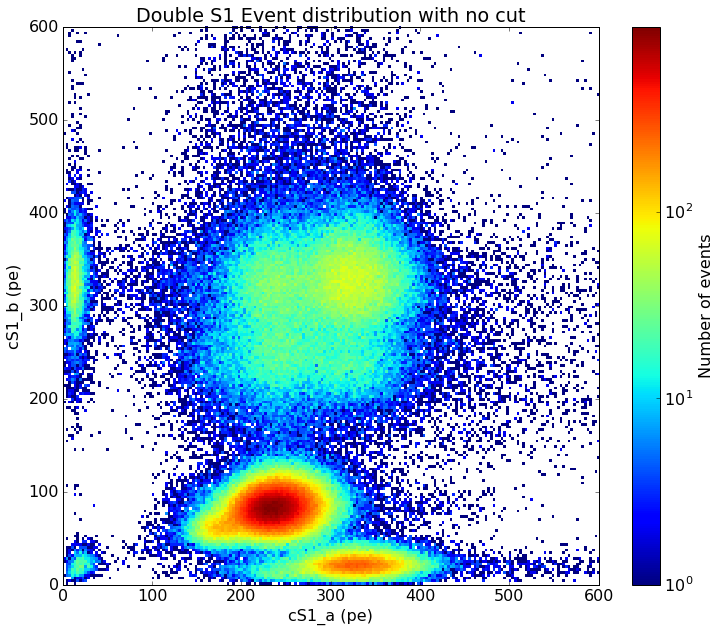

In [22]:
plt.plot()
plt.hist2d(df['cs1_a'],
            df['cs1_b'], 
            range=[[0,600],[0,600]],
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('cS1_a (pe)')
plt.ylabel('cS1_b (pe)')
plt.title('Double S1 Event distribution with no cut')
plt.savefig('Double S1 Event distribution with no cut.png')
plt.show()

# Cut apply

Delay Time between the two signals : [600 - 2000] ns 

Number of PMTs contributing to second S1 distinct from the PMTs that contributed to the first S1 > 3

Fiducial Volume (0< r$^2$ <1000 cm$^2$ and -80< z <-20 cm)

In [23]:
#Selectin on delay time
df_dt_cut = df[(df['s1_dt_center_time']>600) & (df['s1_dt_center_time']<2000)]
print (len(df_dt_cut))

198814


In [24]:
#Selection on contributing channels
df_ch_cut=df_dt_cut[df_dt_cut['ds_s1_b_n_distinct_channels']>3]
print(len(df_dt_cut))

198814


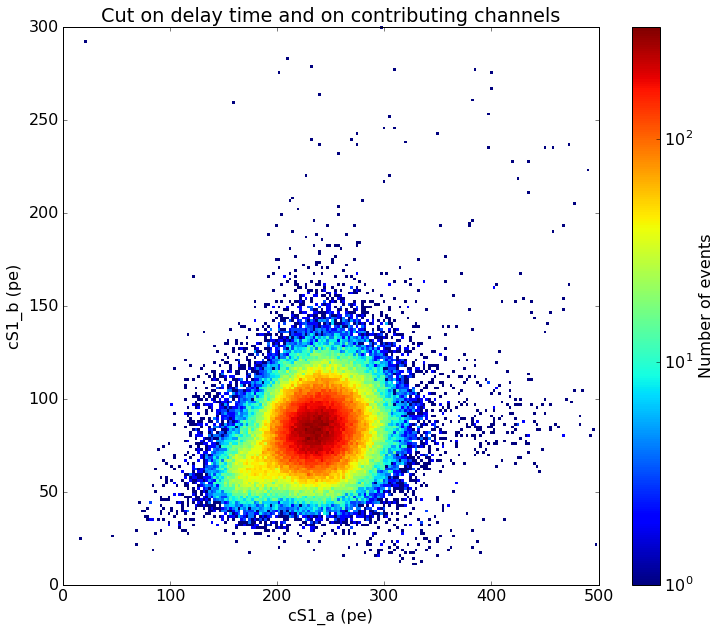

In [25]:
plt.plot()
plt.hist2d(df_ch_cut['cs1_a'],
            df_ch_cut['cs1_b'], 
            range=[[0,500],[0,300]],
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('cS1_a (pe)')
plt.ylabel('cS1_b (pe)')
plt.title('Cut on delay time and on contributing channels')
plt.show()

In [27]:
#Cut on the fiducial volume
df_fv_cut=df_ch_cut[(df_ch_cut['int_a_z'] <= -20) & (df_ch_cut['int_a_z'] >= -80)
             & (df_ch_cut['int_a_x']**2 + df_ch_cut['int_a_y']**2 <= 1000)
             & (df_ch_cut['int_b_z'] <= -20) & (df_ch_cut['int_b_z'] >= -80)
             & (df_ch_cut['int_b_x']**2 + df_ch_cut['int_b_y']**2 <= 1000 )]
print(len(df_fv_cut))
df2=df_fv_cut

41070


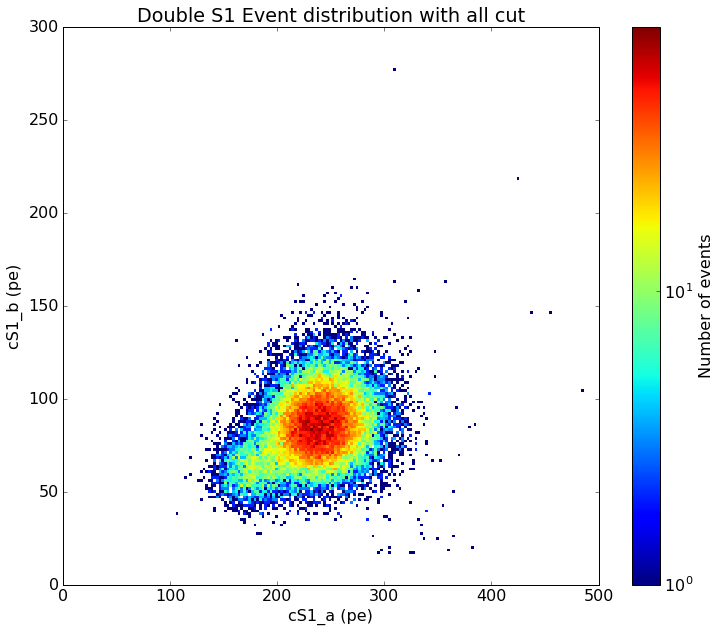

In [28]:
plt.plot()
plt.hist2d(df_fv_cut['cs1_a'],
            df_fv_cut['cs1_b'], 
            range=[[0,500],[0,300]],
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('cS1_a (pe)')
plt.ylabel('cS1_b (pe)')
plt.title('Double S1 Event distribution with all cut')
plt.show()

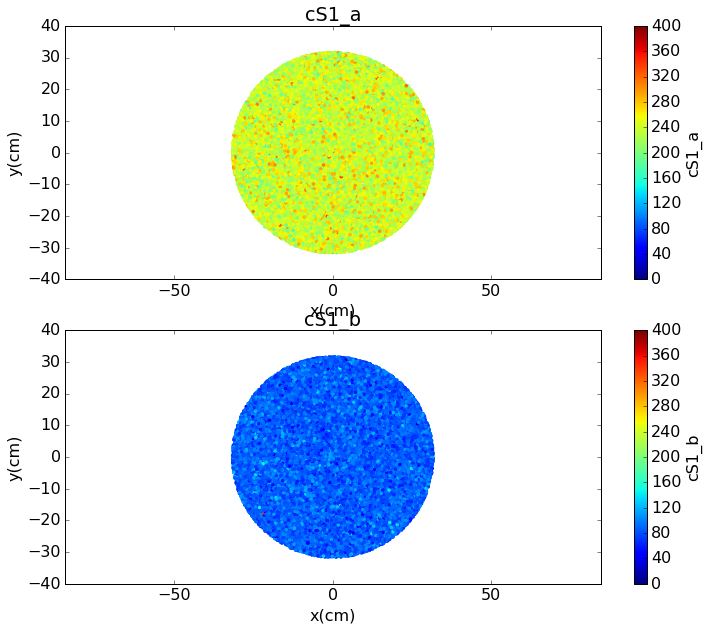

In [36]:
plt.subplot(211)

plt.scatter(df2['int_a_x'],df2['int_a_y'], c=df2['cs1_a'],
            edgecolor='none', marker='.', s=50, vmin=0, vmax=400 )
plt.xlabel('x(cm)')
plt.ylabel('y(cm)')

plt.colorbar(label='cS1_a')


plt.axis('equal')
plt.title('cS1_a')

plt.subplot(212)

plt.scatter(df2['int_b_x'],df2['int_b_y'], c=df2['cs1_b'],
            edgecolor='none', marker='.', s=50, vmin=0, vmax=400 )
plt.xlabel('x(cm)')
plt.ylabel('y(cm)')

plt.colorbar(label='cS1_b')

plt.title('cS1_b')
plt.axis('equal')
plt.show()


In [38]:
print('The total number of events left after all the cut applied is ', len(df2))
print('Fraction of remaning events ', len(df2)/len(data)*100, '%')

The total number of events left after all the cut applied is  41070
Fraction of remaning events  1.2626724568617655 %


# S1s as a function of delay time

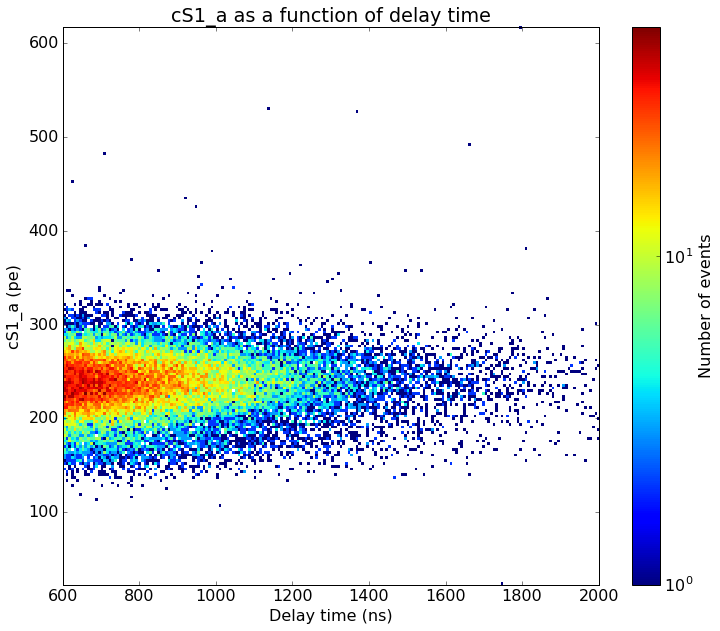

In [39]:
plt.plot()
plt.hist2d(df2['s1_dt_center_time'],
            df2['cs1_a'],
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('Delay time (ns)')
plt.ylabel('cS1_a (pe)')
plt.title ('cS1_a as a function of delay time')
plt.show()


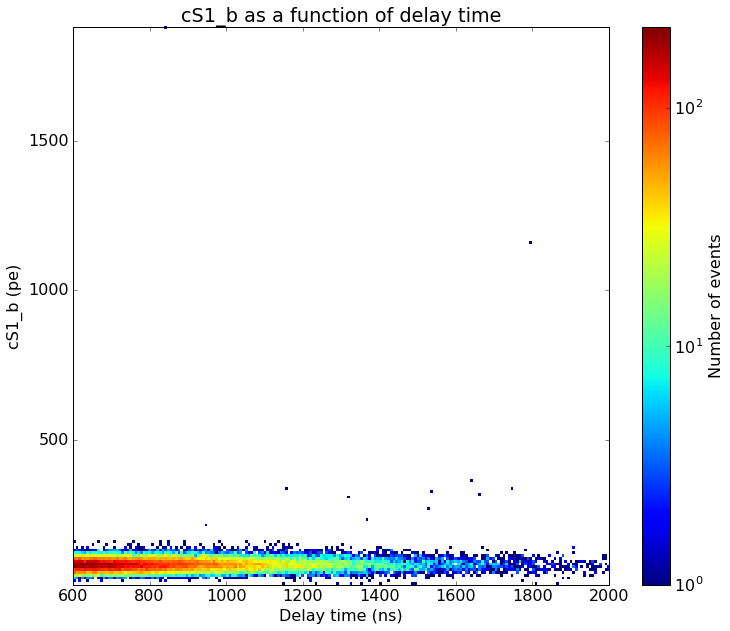

In [40]:
plt.plot(122)
plt.hist2d(df2['s1_dt_center_time'],
            df2['cs1_b'], 
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('Delay time (ns)')
plt.ylabel('cS1_b (pe)')
plt.title('cS1_b as a function of delay time')
plt.show()


One very point at very high ? 
Let's cut it for the moment

In [43]:
df2=df2[df2['cs1_b']<500]
print(len(df2))

41068


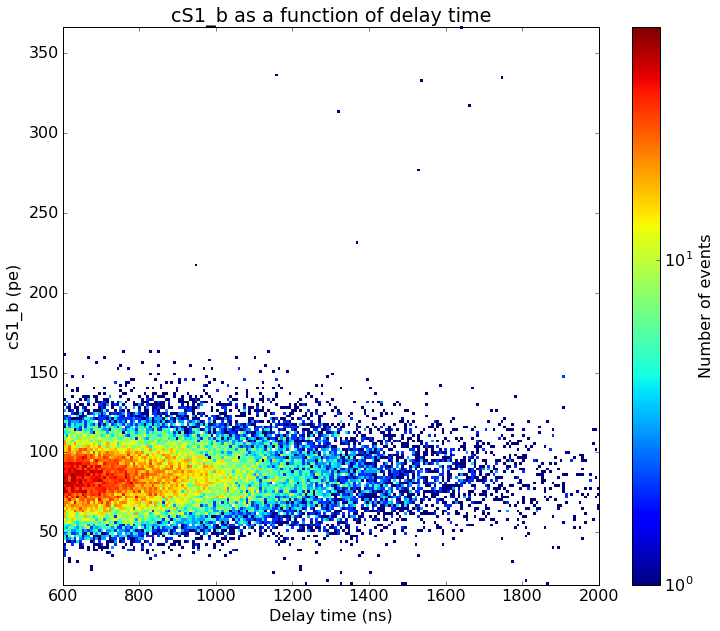

In [44]:
plt.plot(122)
plt.hist2d(df2['s1_dt_center_time'],
            df2['cs1_b'], 
            bins=[200,200], norm=matplotlib.colors.LogNorm())

plt.colorbar(label='Number of events')
plt.xlabel('Delay time (ns)')
plt.ylabel('cS1_b (pe)')
plt.title('cS1_b as a function of delay time')
plt.show()

# Light Yield and Electron Lifetime
error bar = standard deviation / sqrt(number of events)

## Corrected S1 signals

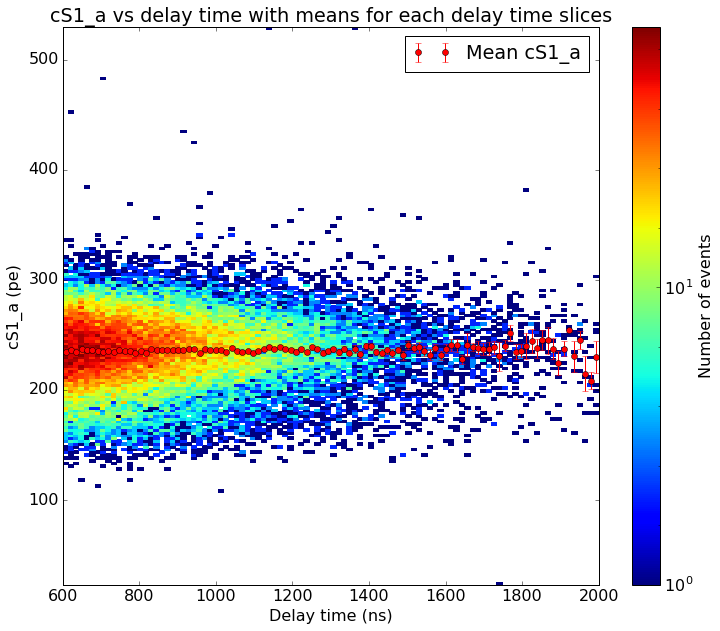

In [48]:
# Error bar : standard deviation / sqrt(N)

delay_time=df2['s1_dt_center_time']
cs1_a=df2['cs1_a']

h = Histdd(delay_time, cs1_a, bins=(100,200), #Mean calculate on each bins
           axis_names=['delay_time', 'cs1_a'])

t = h.bin_centers('delay_time') # t = delay time (bin) 
ms1_a = h.average('cs1_a').histogram # ms1_a = mean value of s1_a
std_error_a = (h.std(axis='cs1_a') / np.sqrt(h.sum('cs1_a'))).histogram # std : Compute the standard deviation along the specified axis

h.plot(log_scale=True, cblabel='Number of events')
plt.errorbar(t, ms1_a, yerr=std_error_a,
             marker='o', linestyle='', color='red',
             label='Mean cS1_a')
plt.xlabel('Delay time (ns)')
plt.ylabel('cS1_a (pe)')


plt.legend()
plt.title("cS1_a vs delay time with means for each delay time slices")
plt.show()

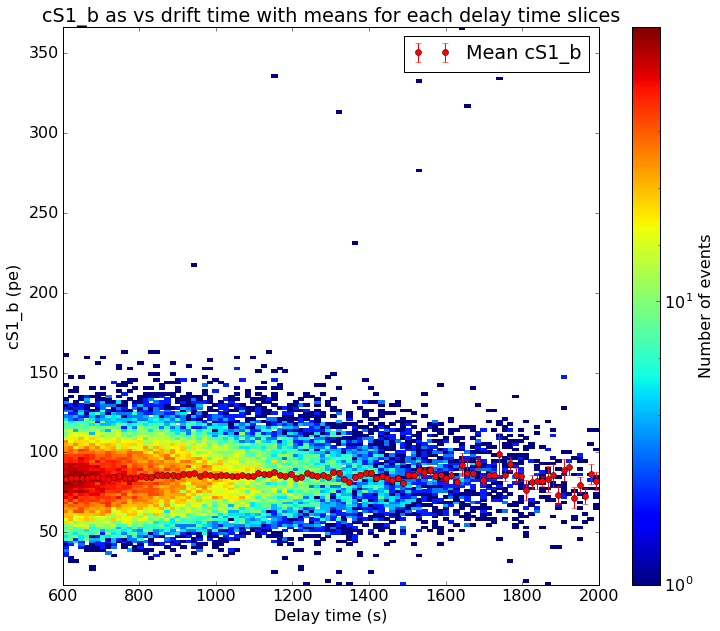

In [49]:
# Error bar : standard deviation / sqrt(N)

delay_time=df2['s1_dt_center_time']
cs1_b=df2['cs1_b']

h = Histdd(delay_time, cs1_b, bins=(100, 200), #Mean calculate on each bins
           axis_names=['delay_time', 'cs1_b'])

t = h.bin_centers('delay_time') # t = delay time (bin) 
ms1_b = h.average('cs1_b').histogram # ms1 = mean value of s1
std_error_b = (h.std(axis='cs1_b') / np.sqrt(h.sum('cs1_b'))).histogram # std : Compute the standard deviation along the specified axis

h.plot(log_scale=True, cblabel='Number of events')
plt.errorbar(t, ms1_b, yerr=std_error_b,
             marker='o', linestyle='', color='red',
             label='Mean cS1_b')
plt.xlabel('Delay time (s)')
plt.ylabel('cS1_b (pe)')

plt.legend()
plt.title("cS1_b as vs drift time with means for each delay time slices")
plt.show()


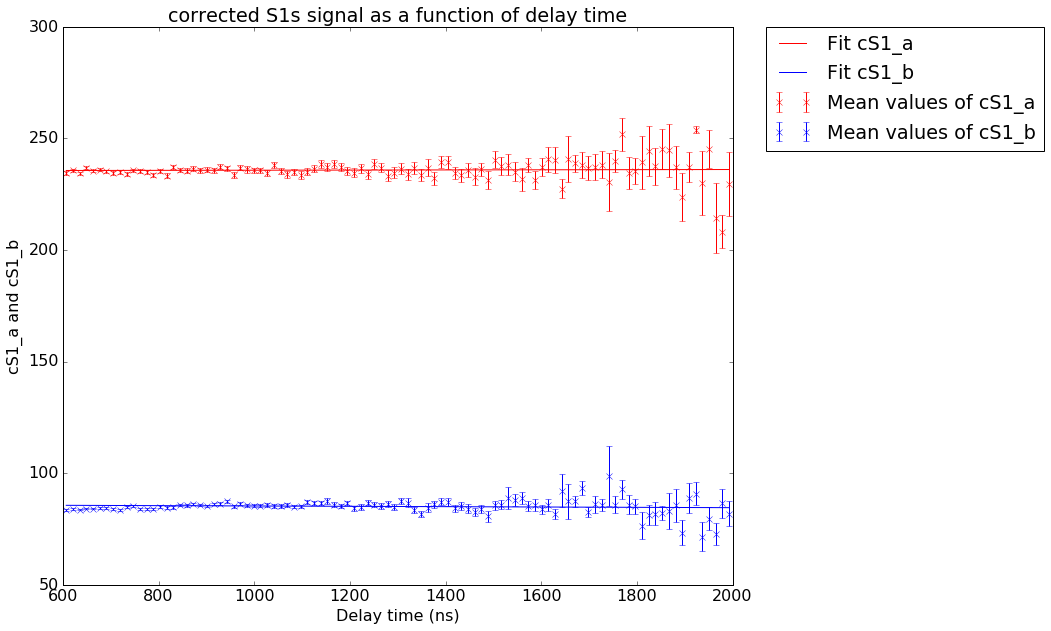

In [57]:
fit_a = np.polyfit(t, ms1_a, deg=1)
fit_b = np.polyfit(t, ms1_b, deg=1)

plt.plot()
plt.errorbar(t, ms1_a, yerr=std_error_a,
             marker='x', linestyle='', color='red',
             label='Mean values of cS1_a')
plt.plot(t, fit_a[0] * t + fit_a[1], color='red', label="Fit cS1_a")
plt.errorbar(t, ms1_b, yerr=std_error_b,
             marker='x', linestyle='', color='blue',
             label='Mean values of cS1_b')
plt.plot(t, fit_b[0] *t + fit_b[1], color='blue', label="Fit cS1_b")
plt.title('corrected S1s signal as a function of delay time')
plt.xlabel('Delay time (ns)')
plt.ylabel('cS1_a and cS1_b')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

## Light Yield

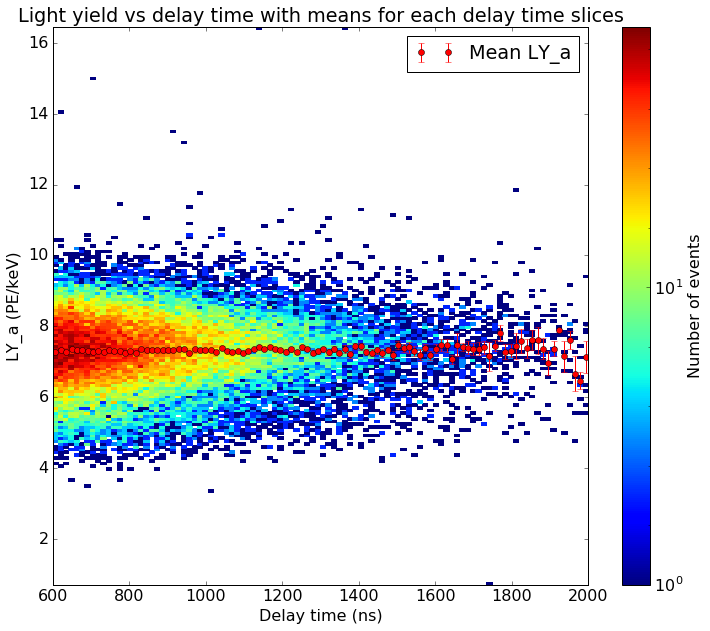

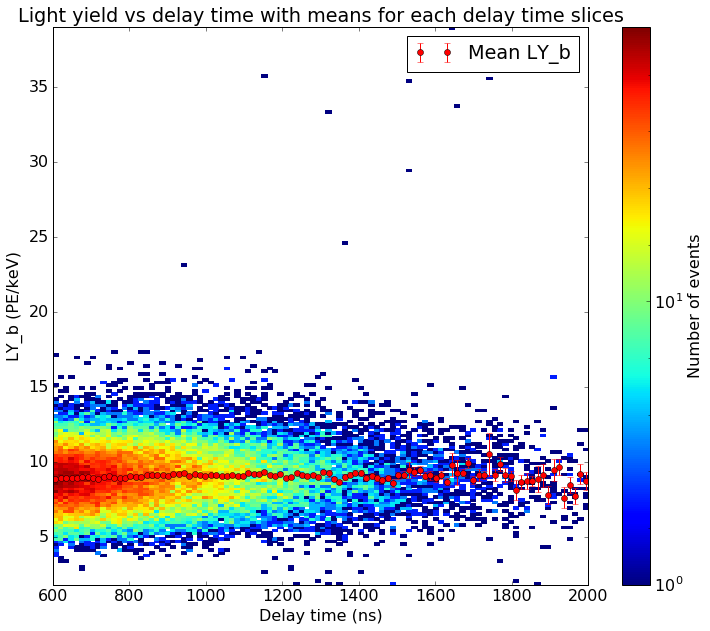

In [63]:
# # Error bar : standard deviation / sqrt(N)

delay_time=df2['s1_dt_center_time']
LY_a=df2['cs1_a']/32.2

h = Histdd(delay_time, LY_a, bins=(100,200), #Mean calculate on each bins
           axis_names=['delay_time', 'LY_a'])

t = h.bin_centers('delay_time') # t = delay time (bin) 
mLY_a = h.average('LY_a').histogram # ms1_a = mean value of s1_a
std_error_lya = (h.std(axis='LY_a') / np.sqrt(h.sum('LY_a'))).histogram # std : Compute the standard deviation along the specified axis

h.plot(log_scale=True, cblabel='Number of events')
plt.errorbar(t, mLY_a, yerr=std_error_lya,
             marker='o', linestyle='', color='red',
             label='Mean LY_a')
plt.xlabel('Delay time (ns)')
plt.ylabel('LY_a (PE/keV)')


plt.legend()
plt.title("Light yield vs delay time with means for each delay time slices")
plt.show()

LY_b=df2['cs1_b']/9.4

hb = Histdd(delay_time, LY_b, bins=(100,200), #Mean calculate on each bins
           axis_names=['delay_time', 'LY_b'])

t = hb.bin_centers('delay_time') # t = delay time (bin) 
mLY_b = hb.average('LY_b').histogram # ms1_a = mean value of s1_a
std_error_lyb = (hb.std(axis='LY_b') / np.sqrt(hb.sum('LY_b'))).histogram # std : Compute the standard deviation along the specified axis

hb.plot(log_scale=True, cblabel='Number of events')
plt.errorbar(t, mLY_b, yerr=std_error_lyb,
             marker='o', linestyle='', color='red',
             label='Mean LY_b')
plt.xlabel('Delay time (ns)')
plt.ylabel('LY_b (PE/keV)')


plt.legend()
plt.title("Light yield vs delay time with means for each delay time slices")
plt.show()

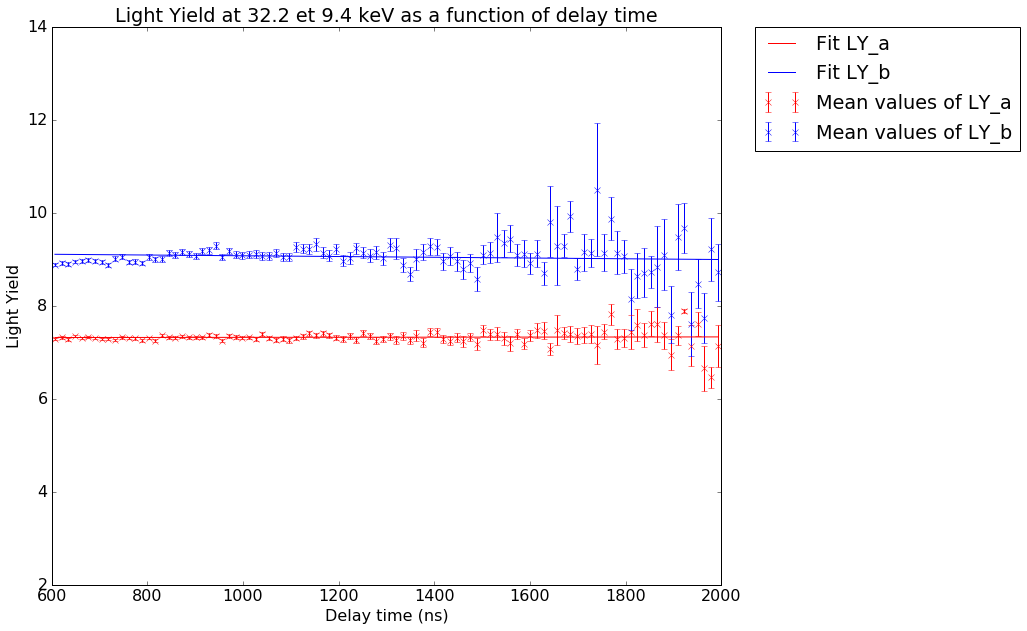

In [67]:
fit_LYa = np.polyfit(t, mLY_a, deg=1)
fit_LYb = np.polyfit(t, mLY_b, deg=1)

plt.plot()
plt.errorbar(t, mLY_a, yerr=std_error_lya,
             marker='x', linestyle='', color='red',
             label='Mean values of LY_a')
plt.plot(t, fit_LYa[0] * t + fit_LYa[1], color='red', label="Fit LY_a")


plt.errorbar(t, mLY_b, yerr=std_error_lyb,
             marker='x', linestyle='', color='blue',
             label='Mean values of LY_b')
plt.plot(t, fit_LYb[0] *t + fit_LYb[1], color='blue', label="Fit LY_b")


plt.title('Light Yield at 32.2 et 9.4 keV as a function of delay time')
plt.xlabel('Delay time (ns)')
plt.ylabel('Light Yield')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim(2,14)
plt.show()

In [65]:
print ('Light Yield at 32.2 keV = ',fit_LYa[1])
print ('Light Yield at 9.4 keV = ',fit_LYb[1])

Light Yield at 32.2 keV =  7.31166181569
Light Yield at 9.4 keV =  9.15663402174


## Electron LifeTime

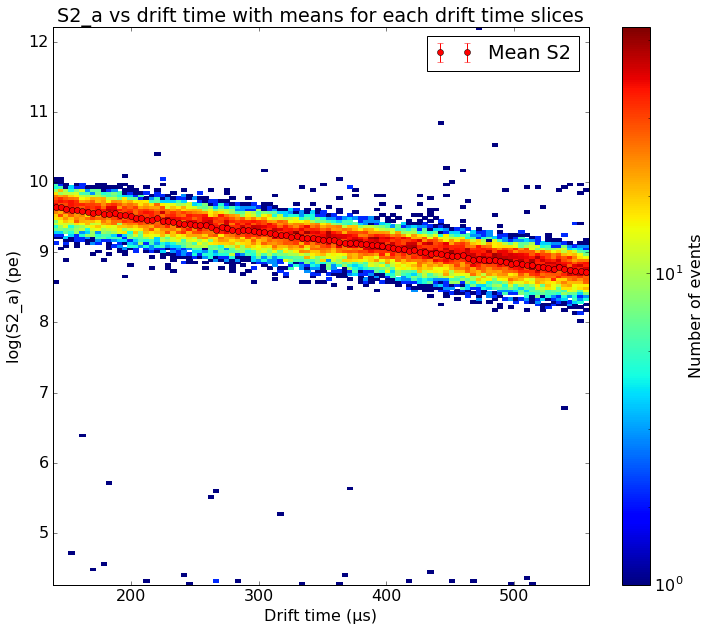

In [53]:
# Error bar : standard deviation / sqrt(N)

drift_time= df2['int_a_drift_time']/1000
s2_a= np.log(df2['s2_a'])

h = Histdd(drift_time, s2_a, bins=(100, 200), #Mean calculate on each bins
           axis_names=['drift_time', 's2_a'])

dt = h.bin_centers('drift_time')
ms2_a = h.average('s2_a').histogram
std_error_s2_a = (h.std(axis='s2_a') / np.sqrt(h.sum('s2_a'))).histogram # std : Compute the standard deviation along the specified axis

h.plot(log_scale=True, cblabel='Number of events')
plt.errorbar(dt, ms2_a, yerr=std_error_s2_a,
             marker='o', linestyle='', color='red',
             label='Mean S2')
plt.xlabel('Drift time (µs)')
plt.ylabel('log(S2_a) (pe)')
# plt.ylim(8,10)
# plt.xlim(100,650)
plt.legend()
plt.title("S2_a vs drift time with means for each drift time slices")
plt.show()

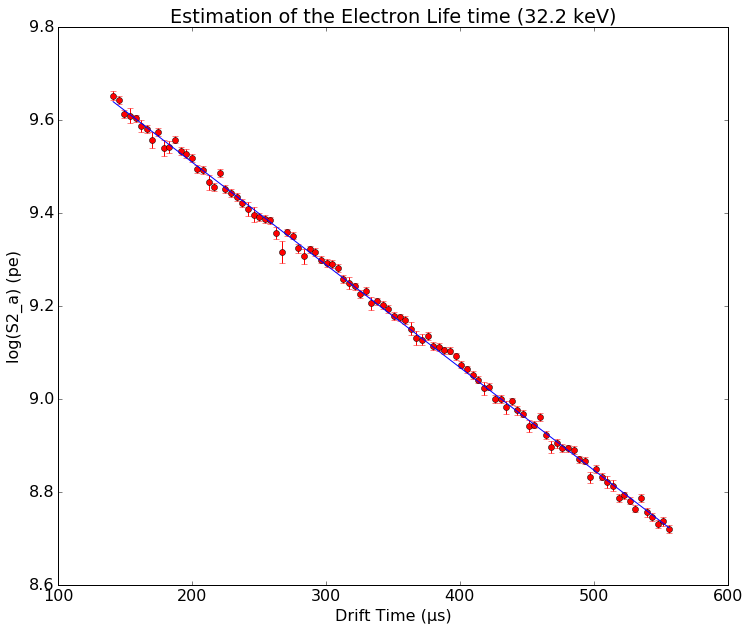

Electron Life time=  453.031789615 µs


In [54]:
fit_s2_a = np.polyfit(dt, ms2_a, deg=1)
plt.plot()
plt.errorbar(dt,ms2_a, yerr=std_error_s2_a,
             marker='o', linestyle='', color='red',
             label='Mean S2_a')
plt.plot(dt, fit_s2_a[0] * dt + fit_s2_a[1], color='blue', label="Fit")
# plt.xlim(100,600)
# plt.ylim(8,10)
plt.title('Estimation of the Electron Life time (32.2 keV)')
plt.xlabel('Drift Time (µs)')
plt.ylabel('log(S2_a) (pe)')
plt.show()

print("Electron Life time= ", -1/(fit_s2_a[0]) , 'µs')


# Conclusion

The code works quite well, but I don't get the same values as Sara did in this note https://xecluster.lngs.infn.it/dokuwiki/doku.php?id=xenon:xenon1t:sara:kr83m_november (for the same dataset: Nov 2017). 

Sara's values: 
- Light yield at 32.2 keV : 5.54 $\pm$ 0.01 PE/keV
- Light yield at 9.4 keV : 6.96 $\pm$ 0.02 PE/keV

My values : 
- Light yield at 32.2 keV : 7.31 PE/keV
- Light yield at 9.4 keV : 9.15 PE/keV

It's probably due to the fact that the pax version changed (Sara used data processed with pax_v6.1.0, I used pax_v6.5.0)

We expect a change about 25%, which is consistent with the values.

The second "method" to extract Light Yield and Electron Live time are more efficient and have the advantage of determining the error bars. 